In [5]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

In [6]:
import os

# Set up some variables for the training data paths
BASE_DATA_PATH = os.path.join('..', 'data')
TRAIN_DATA_PATH = os.path.join(BASE_DATA_PATH, 'train')

TRAINING_PROVIDERS_PATH = os.path.join(TRAIN_DATA_PATH, 'Train-1542865627584.csv')
TRAINING_INPATIENT_PATH = os.path.join(TRAIN_DATA_PATH, 
    'Train_Inpatientdata-1542865627584.csv')
TRAINING_OUTPATIENT_PATH = os.path.join(TRAIN_DATA_PATH, 
    'Train_Outpatientdata-1542865627584.csv')
TRAINING_BENEFICIARY_PATH = os.path.join(TRAIN_DATA_PATH, 
    'Train_Beneficiarydata-1542865627584.csv')

# Defines the default behavior for responding to values that do not exist in data set
DEFAULT_NA_VALUE = "None"

In [7]:
trn_tv = pd.read_csv(TRAINING_PROVIDERS_PATH)
trn_inpat = pd.read_csv(TRAINING_INPATIENT_PATH)
trn_outpat = pd.read_csv(TRAINING_OUTPATIENT_PATH)
trn_bene = pd.read_csv(TRAINING_BENEFICIARY_PATH)

In [8]:
trn_bene.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [9]:
print("DOB count = {} \nDOD count={}".format(trn_bene['DOB'].count(), trn_bene['DOD'].count()))

DOB count = 138556 
DOD count=1421


# DOD is mostly NaN. Exclude this feature from scope of study

In [10]:
trn_bene.dropna(thresh=10000, axis=1, inplace=True)
trn_bene.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


# IPAnnualReimbursementAmt and OPAnnualReimbursementAmt has negative values. Correct these values to 0 of column mean

In [11]:
trn_benecln = trn_bene[['IPAnnualReimbursementAmt','OPAnnualReimbursementAmt']][trn_bene[['IPAnnualReimbursementAmt','OPAnnualReimbursementAmt']] >= 0].fillna(value = {'IPAnnualReimbursementAmt': trn_bene['IPAnnualReimbursementAmt'].mean(),'OPAnnualReimbursementAmt': trn_bene['OPAnnualReimbursementAmt'].mean()})
trn_bene['IPAnnualReimbursementAmt'] = trn_benecln['IPAnnualReimbursementAmt']
trn_bene['OPAnnualReimbursementAmt'] = trn_benecln['OPAnnualReimbursementAmt']
trn_bene.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,1.762847,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.837966,399.847296,1298.335104,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,0.425339,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.483958,956.175202,2493.870104,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2300.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [12]:
print("Inpatient:\n{}\nOutpatient:\n{}".format(trn_inpat.count(), trn_outpat.count()))

Inpatient:
BeneID                    40474
ClaimID                   40474
ClaimStartDt              40474
ClaimEndDt                40474
Provider                  40474
InscClaimAmtReimbursed    40474
AttendingPhysician        40362
OperatingPhysician        23830
OtherPhysician             4690
AdmissionDt               40474
ClmAdmitDiagnosisCode     40474
DeductibleAmtPaid         39575
DischargeDt               40474
DiagnosisGroupCode        40474
ClmDiagnosisCode_1        40474
ClmDiagnosisCode_2        40248
ClmDiagnosisCode_3        39798
ClmDiagnosisCode_4        38940
ClmDiagnosisCode_5        37580
ClmDiagnosisCode_6        35636
ClmDiagnosisCode_7        33216
ClmDiagnosisCode_8        30532
ClmDiagnosisCode_9        26977
ClmDiagnosisCode_10        3927
ClmProcedureCode_1        23148
ClmProcedureCode_2         5454
ClmProcedureCode_3          965
ClmProcedureCode_4          116
ClmProcedureCode_5            9
ClmProcedureCode_6            0
dtype: int64
Outpatient:
Bene

In [13]:
trn_inpat.describe()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
count,40474.000000,39575.0,23148.000000,5454.000000,965.000000,116.000000,9.000000,0.0
mean,10087.884074,1068.0,5894.611759,4103.738174,4226.355440,4070.172414,5269.444444,NaN
std,10303.099402,0.0,3049.304400,2028.182156,2282.761581,1994.409802,2780.071632,NaN
min,0.000000,1068.0,11.000000,42.000000,42.000000,42.000000,2724.000000,NaN
25%,4000.000000,1068.0,3848.000000,2724.000000,2724.000000,2758.750000,4139.000000,NaN
50%,7000.000000,1068.0,5369.000000,4019.000000,4019.000000,4019.000000,4139.000000,NaN
75%,12000.000000,1068.0,8666.250000,4439.000000,5185.000000,4439.000000,5185.000000,NaN
max,125000.000000,1068.0,9999.000000,9999.000000,9999.000000,9986.000000,9982.000000,NaN


# Deductible Amount doesn't look right (TBA)

In [14]:
trn_outpat.describe()

,InscClaimAmtReimbursed,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid
count,517737.000000,162.000000,36.000000,4.000000,2.000000,0.0,0.0,517737.000000
mean,286.334799,6116.611111,4503.277778,2959.000000,4075.500000,NaN,NaN,2.779233
std,694.034343,3217.719258,2504.015000,1863.455393,5323.806956,NaN,NaN,15.785839
min,0.000000,51.000000,412.000000,412.000000,311.000000,NaN,NaN,0.000000
25%,40.000000,3893.000000,2724.000000,2146.000000,2193.250000,NaN,NaN,0.000000
50%,80.000000,5244.500000,4019.000000,3511.500000,4075.500000,NaN,NaN,0.000000
75%,200.000000,9421.500000,5849.000000,4324.500000,5957.750000,NaN,NaN,0.000000
max,102500.000000,9999.000000,9982.000000,4401.000000,7840.000000,NaN,NaN,897.000000


# Insurance claim amount reimbursed max is too far from the mean - Outlier (TBA)

In [15]:
trn_tv['PotentialFraud'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
trn_inpat['In/Out'] = 'In'
trn_outpat['In/Out'] = 'Out'

In [17]:
trn_tmp = pd.concat([trn_inpat,trn_outpat], ignore_index = True)
trn_tmp

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,In/Out
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,In
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,In
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,In
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,In
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,NaN,NaN,0.0,NaN,NaN,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Out
558207,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,NaN,NaN,0.0,NaN,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Out
558208,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,NaN,NaN,0.0,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Out
558209,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Out


In [18]:
trn_df = pd.merge(pd.merge(trn_tmp, trn_tv,how='inner', on=['Provider']),trn_bene, how='inner', on=['BeneID'])

In [19]:
trn_df.count()

BeneID                             558211
ClaimID                            558211
ClaimStartDt                       558211
ClaimEndDt                         558211
Provider                           558211
InscClaimAmtReimbursed             558211
AttendingPhysician                 556703
OperatingPhysician                 114447
OtherPhysician                     199736
AdmissionDt                         40474
ClmAdmitDiagnosisCode              145899
DeductibleAmtPaid                  557312
DischargeDt                         40474
DiagnosisGroupCode                  40474
ClmDiagnosisCode_1                 547758
ClmDiagnosisCode_2                 362605
ClmDiagnosisCode_3                 243055
ClmDiagnosisCode_4                 164536
ClmDiagnosisCode_5                 111924
ClmDiagnosisCode_6                  84392
ClmDiagnosisCode_7                  66177
ClmDiagnosisCode_8                  53444
ClmDiagnosisCode_9                  41815
ClmDiagnosisCode_10               

In [20]:
trn_df.set_index(['Provider','In/Out','BeneID'],inplace=True)
trn_df.sort_values(['Provider','In/Out','BeneID'],inplace=True)

In [21]:
#trn_df.sort_values(['Provider','In/Out','BeneID'], inplace=True)
trn_df.head()

ClaimID ClaimStartDt  ClaimEndDt  \
Provider In/Out BeneID                                          
PRV51001 In     BENE102690  CLM49733   2009-05-04  2009-05-18   
                BENE152088  CLM37205   2009-02-06  2009-02-06   
                BENE36012   CLM58316   2009-07-04  2009-07-08   
                BENE38773   CLM52334   2009-05-23  2009-05-25   
                BENE98831   CLM36844   2009-02-03  2009-02-08   

                            InscClaimAmtReimbursed AttendingPhysician  \
Provider In/Out BeneID                                                  
PRV51001 In     BENE102690                   42000          PHY383193   
                BENE152088                    4000          PHY402229   
                BENE36012                    36000          PHY340163   
                BENE38773                    12000          PHY346762   
                BENE98831                     3000          PHY383193   

                           OperatingPhysician OtherPhysician AdmissionDt  \
Provider In/Out BeneID                                                     
PRV51001 In     BENE102690          PHY378091      PHY389113  2009-05-04   
                BENE152088          PHY329739            NaN  2009-02-06   
                BENE36012                 NaN            NaN  2009-07-04   
                BENE38773                 NaN            NaN  2009-05-23   
                BENE98831                 NaN            NaN  2009-02-03   

                           ClmAdmitDiagnosisCode  DeductibleAmtPaid  \
Provider In/Out BeneID                                                
PRV51001 In     BENE102690                 41401             1068.0   
                BENE152088                 80121             1068.0   
                BENE36012                  29623             1068.0   
                BENE38773                   0389             1068.0   
                BENE98831                   5362             1068.0   

                           DischargeDt DiagnosisGroupCode ClmDiagnosisCode_1  \
Provider In/Out BeneID                                                         
PRV51001 In     BENE102690  2009-05-18                245               4241   
                BENE152088  2009-02-06                062              85222   
                BENE36012   2009-07-08                882              29650   
                BENE38773   2009-05-25                864               0388   
                BENE98831   2009-02-08                353              56211   

                           ClmDiagnosisCode_2 ClmDiagnosisCode_3  \
Provider In/Out BeneID                                             
PRV51001 In     BENE102690              42731               4168   
                BENE152088               2724               3310   
                BENE36012                2971               3051   
                BENE38773                5849               2841   
                BENE98831                5533               0088   

                           ClmDiagnosisCode_4 ClmDiagnosisCode_5  \
Provider In/Out BeneID                                             
PRV51001 In     BENE102690               2724               4019   
                BENE152088              40390              V4501   
                BENE36012               V1254              07070   
                BENE38773                2762               7140   
                BENE98831                5789              53081   

                           ClmDiagnosisCode_6 ClmDiagnosisCode_7  \
Provider In/Out BeneID                                             
PRV51001 In     BENE102690              42822               2720   
                BENE152088              V5866                NaN   
                BENE36012               28260               7823   
                BENE38773               E9444                NaN   
                BENE98831               27651               7840   

                           ClmDiagnosi

In [22]:
import matplotlib.pyplot as mpl
%matplotlib inline

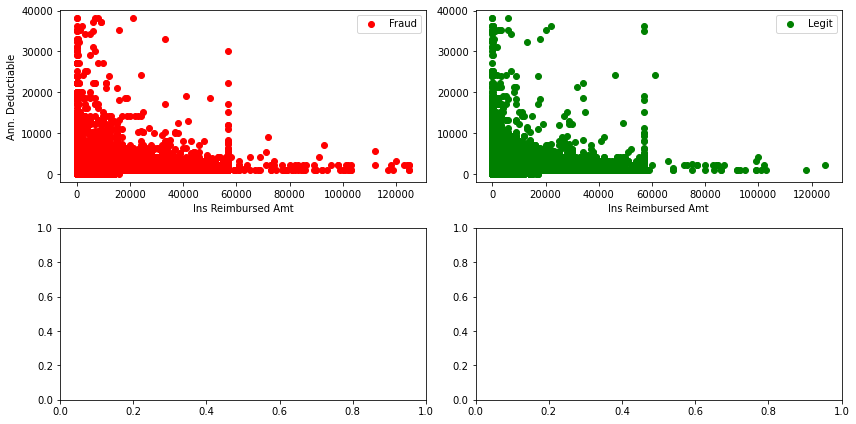

In [245]:
fig, ax = mpl.subplots(nrows=2, ncols=2, figsize=(12,6))
#ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax[0,0].scatter(trn_df['InscClaimAmtReimbursed'][trn_df['PotentialFraud'] == 'Yes'], trn_df['IPAnnualDeductibleAmt'][trn_df['PotentialFraud'] == 'Yes'], c='r', label='Fraud')
ax[0,1].scatter(trn_df['InscClaimAmtReimbursed'][trn_df['PotentialFraud'] == 'No'], trn_df['IPAnnualDeductibleAmt'][trn_df['PotentialFraud'] == 'No'], c='g', label='Legit')
ax[0,0].set_xlabel('Ins Reimbursed Amt')
ax[0,1].set_xlabel('Ins Reimbursed Amt')
ax[0,0].set_ylabel('Ann. Deductiable')
#ax[1].set_ylabel('Ann. Deductible')

ax[0,0].legend(loc=0)
ax[0,1].legend(loc=0)
fig.tight_layout()

# Distribution of the Annual Deductible and Insurance Reimbursed amount is similar for potential fraud and legit providers.